<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/BPCA_analysis_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx','sf','ggpubr','forcats','car'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘corrplot’, ‘Rcpp’, ‘classInt’, ‘s2’, ‘units’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘gridExtra’, ‘polynom’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [3]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)
library(sf)
library(ggpubr)
library(forcats)
library(car)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: carData



In [4]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=dca3c40c563fcf427207316d895af86d&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYazVDRE5jVEJqME94bC1YQ3d2QlIzWnJUT1haUmpEa2Jvc0hPV0JTZnNuVTZIc3ZwWEM3a1pCSk1aaVlxbTR6QSIsInN0YXRlIjoiZGNhM2M0MGM1NjNmY2Y0MjcyMDczMTZkODk1YWY4NmQifQ==


In [5]:

# https://drive.google.com/file/d/1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv/view?usp=drive_link
drive_download(file = as_id('1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv'), path = '/content/firehistory_region_intersect.gpkg', overwrite = TRUE)

File downloaded:

• firehistory_region_intersect.gpkg <id: 1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv>

Saved locally as:

• /content/firehistory_region_intersect.gpkg



In [6]:
# Coarse Woody Debris
# https://drive.google.com/file/d/1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0/view?usp=drive_link
drive_download(file = as_id('1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0'), path = '/content/cwd_rate_table.csv', overwrite = TRUE)

File downloaded:

• cwd_rate_table.csv <id: 1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0>

Saved locally as:

• /content/cwd_rate_table.csv



In [7]:
# LF fractionation
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'full_bpca_exp_dt.csv']$id

drive_download(file = as_id(file_id), path = '/content/full_bpca_exp_dt.csv', overwrite = TRUE)

File downloaded:

• full_bpca_exp_dt.csv <id: 1664xblDUK5yG4zzhhXXomgwK-wR6p31b>

Saved locally as:

• /content/full_bpca_exp_dt.csv



In [8]:
# BPCA Standards
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'standards.csv']$id

drive_download(file = as_id(file_id), path = '/content/standards.csv', overwrite = TRUE)

File downloaded:

• standards.csv <id: 1zNR-qpUKPnO6OpArQYuuweoMG505F7pw>

Saved locally as:

• /content/standards.csv



In [9]:
# Site level data
#https://drive.google.com/file/d/1jl5hrmDSY_4Fw6C7y0tXifYITMI7EzIh/view?usp=drive_link

file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == '2023_01_07_HFF_site_level.csv']$id

drive_download(file = as_id(file_id), path = '/content/2023_01_07_HFF_site_level.csv', overwrite = TRUE)

File downloaded:

• 2023_01_07_HFF_site_level.csv <id: 1jl5hrmDSY_4Fw6C7y0tXifYITMI7EzIh>

Saved locally as:

• /content/2023_01_07_HFF_site_level.csv



In [10]:
# Bulk Density

#https://drive.google.com/file/d/1qc7PMNOWeV-XAByKg157Ztvtnxj_7D35/view?usp=drive_link

file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'HFF_soil_Db.csv']$id

drive_download(file = as_id(file_id), path = '/content/HFF_soil_Db.csv', overwrite = TRUE)

File downloaded:

• HFF_soil_Db.csv <id: 1qc7PMNOWeV-XAByKg157Ztvtnxj_7D35>

Saved locally as:

• /content/HFF_soil_Db.csv



In [11]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')

In [12]:
full_bpca_exp_dt <- fread('/content/full_bpca_exp_dt.csv')

In [13]:
sites_dt <- fread('/content/2023_01_07_HFF_site_level.csv')

In [14]:
stocks_dt <- fread('/content/HFF_soil_Db.csv')

In [15]:
firehist_dt <- st_read('/content/firehistory_region_intersect.gpkg') %>% as.data.table

Reading layer `firehistory_region_intersect' from data source 
  `/content/firehistory_region_intersect.gpkg' using driver `GPKG'
Simple feature collection with 2624 features and 25 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.2572 ymin: 44.20016 xmax: -122.2167 ymax: 44.22144
Geodetic CRS:  WGS 84


In [16]:
firehist_dt[,years_after:=2023-EPISODE]
events_dt <- firehist_dt[EPISODE>0,list(SITE=Site,fire_count=length(unique(EPISODE)),fire_frequency = mean(unique(years_after))/length(unique(years_after))),by=
  c('Site')]
  events_dt$Site <- NULL
# events_dt

In [17]:
full_bpca_exp_dt$V1 <- NULL

In [18]:
cwd_rate_table$V1 <- NULL
names(cwd_rate_table)[1] <- 'SITE'

In [20]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,stocks_dt[,c('SITE','DEPTH','BULKD')],by=c('SITE','DEPTH'))

In [19]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,cwd_rate_table,by=c('SITE'))

In [21]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,events_dt,by=c('SITE'),all.x = T)

In [22]:
full_bpca_exp_dt$FRACTION <- full_bpca_exp_dt$FRACTION  %>% factor(levels = c('LF','HF','BULK'))
full_bpca_exp_dt$DEPTH <- full_bpca_exp_dt$DEPTH  %>% factor(levels = c('0-5','5-10','10-20','20-30'))
full_bpca_exp_dt$BURN_SEVERITY <- full_bpca_exp_dt$BURN_SEVERITY  %>% factor(levels = c('control','low','moderate','high'))

In [23]:
full_bpca_exp_dt %>% names

[1] "SITE"                           "DEPTH"                         
 [3] "FRACTION"                       "BURN_SEVERITY"                 
 [5] "TREATMENT"                      "DEPTH_UPPER"                   
 [7] "DEPTH_LOWER"                    "CONC_240"                      
 [9] "CONC_216"                       "CONC_MEAN"                     
[11] "PEARSONS"                       "FRACTIONATION_MASS_RECOVERED_G"
[13] "STARTING_FRACT_MASS_SOIL_G"     "MASS_PROPORTION_RECOVERED"     
[15] "RECOVERY"                       "C_PERC"                        
[17] "N_PERC"                         "ACCEPT"                        
[19] "BPCA_STARTING_MASS_MG"          "decayed_mass_kg"               
[21] "total_input"                    "burn_decayed_mass_kg"          
[23] "wood_input_rate"                "wood_departure_rate"           
[25] "wood_accumulation_rate"         "years_to_capacity"             
[27] "years_to_recovery"              "BULKD"                         
[29] "fire_count"                     "fire_frequency"

In [25]:
full_bpca_exp_dt[3,][,.(CONC_MEAN,BPCA_STARTING_MASS_MG,C_PERC,MASS_PROPORTION_RECOVERED)]

CONC_MEAN,BPCA_STARTING_MASS_MG,C_PERC,MASS_PROPORTION_RECOVERED
<dbl>,<dbl>,<dbl>,<dbl>
0.05075127,3.961,22.17,0.215


In [26]:
full_bpca_exp_dt$DEPTH_UPPER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[1]}) %>% unlist %>% as.numeric
full_bpca_exp_dt$DEPTH_LOWER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[2]}) %>% unlist %>% as.numeric
full_bpca_exp_dt[,mg_ml_bpca := (CONC_MEAN/BPCA_STARTING_MASS_MG) ]
full_bpca_exp_dt[,g_kg_bpca_lf := MASS_PROPORTION_RECOVERED*mg_ml_bpca,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,g_PyC_kg_LF_C := (CONC_MEAN*1000/BPCA_STARTING_MASS_MG)/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,g_PyC_kg_LF_C_soil := g_PyC_kg_LF_C*MASS_PROPORTION_RECOVERED,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,C_N := C_PERC/N_PERC,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,carbon_stock:= (DEPTH_LOWER %>% as.numeric - DEPTH_UPPER%>% as.numeric )*((BULKD %>% as.numeric ))*(C_PERC/100)*100]
full_bpca_exp_dt[,carbon_stock_fraction:= (DEPTH_LOWER %>% as.numeric - DEPTH_UPPER%>% as.numeric )*((BULKD %>% as.numeric ))*MASS_PROPORTION_RECOVERED*(C_PERC/100)*100]
full_bpca_exp_dt[BURN_SEVERITY!='control',TREATMENT := 'treatment']
full_bpca_exp_dt[BURN_SEVERITY=='control',TREATMENT := 'control']
full_bpca_exp_dt[ ,TREATMENT := 'control']
full_bpca_exp_dt[,exp_group:= SITE %>% gsub('C','',.) %>% substr(1,1)]

In [27]:
#while(TRUE){}

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 295 rows containing non-finite values (`stat_bin()`).”


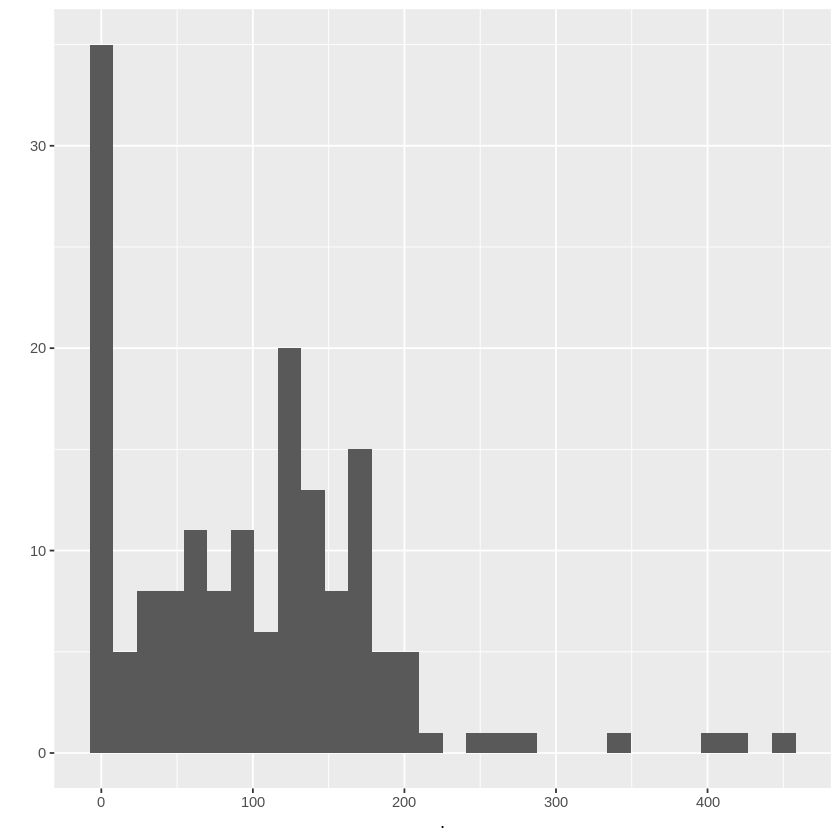

In [28]:
full_bpca_exp_dt$g_PyC_kg_LF_C %>% qplot

In [29]:
analysis_full_bpca_exp_dt <-
full_bpca_exp_dt[ACCEPT =='T' &!is.na(DEPTH),list(
  CONC_MEAN=mean(CONC_MEAN,na.rm=T),
  C_PERC=mean(C_PERC,na.rm=T),
  N_PERC=mean(N_PERC,na.rm=T),
  C_N = mean(C_N,na.rm=T),
  mg_ml_bpca=mean(mg_ml_bpca,na.rm=T),
  g_kg_bpca_lf=mean(g_kg_bpca_lf,na.rm=T),
  g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C,na.rm=T),
  per_bpca_carb_lf = mean(per_bpca_carb_lf,na.rm=T),
  carbon_stock = mean(carbon_stock,na.rm=T),
  carbon_stock_fraction = mean(carbon_stock_fraction,na.rm=T),
  MASS_PROPORTION_RECOVERED=mean(MASS_PROPORTION_RECOVERED,na.rm=T),
  decayed_mass_kg = mean(decayed_mass_kg,na.rm=T),
  total_input = mean(total_input,na.rm=T),
  burn_decayed_mass_kg = mean(burn_decayed_mass_kg,na.rm=T),
  wood_input_rate = mean(wood_input_rate,na.rm=T),
  wood_departure_rate = mean(wood_departure_rate,na.rm=T),
  wood_accumulation_rate = mean(wood_accumulation_rate,na.rm=T),
  years_to_capacity = mean(years_to_capacity,na.rm=T),
  years_to_recovery = mean(years_to_recovery,na.rm=T),
 fire_count = mean(fire_count,na.rm=T),
 fire_frequency = mean(fire_frequency,na.rm=T)
  ),by=c('SITE','exp_group','FRACTION','DEPTH','BURN_SEVERITY','TREATMENT','DEPTH_UPPER','DEPTH_LOWER')]

In [30]:
analysis_full_bpca_exp_dt$BURN_SEVERITY %>% table

.
 control      low moderate     high 
     180       60       60       60 

In [31]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "carbon_stock_fraction"    
[19] "MASS_PROPORTION_RECOVERED" "decayed_mass_kg"          
[21] "total_input"               "burn_decayed_mass_kg"     
[23] "wood_input_rate"           "wood_departure_rate"      
[25] "wood_accumulation_rate"    "years_to_capacity"        
[27] "years_to_recovery"         "fire_count"               
[29] "fire_frequency"

In [158]:
t_tests_fractions_dt <-
c('HF','LF','BULK') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('C_N','C_PERC','N_PERC','carbon_stock') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [173]:
t_tests_carbon_stock_fraction_dt <-
c('LF', 'HF') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('carbon_stock_fraction') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [34]:
t_tests_bpca_dt <-
c( 'LF') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf','g_PyC_kg_LF_C','carbon_stock_fraction') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [170]:
# frac = 'BULK'
# variable = 'wood_input_rate'
# group = 'H'
# depth = '0-5'
# control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac][DEPTH==depth]
# exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac][DEPTH==depth]

In [169]:
# exp_dt %>% head
# control_dt %>% head

In [168]:
# analysis_full_bpca_exp_dt

In [167]:
# t_tests_dwd_unpaired_dt[order(p)][p<0.05]

In [166]:
# t_tests_dwd_paired_dt[order(p)][p<0.05]

In [171]:
t_tests_dwd_dt <-
c('BULK') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('decayed_mass_kg','total_input','burn_decayed_mass_kg','wood_input_rate','wood_departure_rate','wood_accumulation_rate','years_to_capacity','years_to_recovery') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
(analysis_full_bpca_exp_dt$DEPTH %>% levels)[1] %>%
lapply(function(depth){

control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac][DEPTH==depth][,pair:=SITE %>% gsub('C','',.) %>% gsub(group,'',.) %>% as.numeric][order(pair),]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac][DEPTH==depth][,pair:=SITE %>% gsub('C','',.) %>% gsub(group,'',.) %>% as.numeric][order(pair),]


t_result <- t.test(control_dt[[variable]] ,exp_dt[[variable]])
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=depth,
          p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][[variable]] ),
          exp_group = group
          # pair = control_dt$pair
          # exp_x = exp_dt[[variable]],
          # cont_x = control_dt[[variable]]
          )

}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [164]:
# t_tests_dwd_paired_dt$variable %>% unique

In [165]:
# t_tests_dwd_paired_dt[variable == ]

In [36]:
new_labels <- c("0-5 cm", "5-10 cm", "10-20 cm", "20-30 cm")

# Replace levels in the DEPTH column
analysis_full_bpca_exp_dt[, DEPTH_Plotting:= factor(DEPTH %>% paste(.,'cm'),
                                            levels = new_labels)]

In [174]:
t_tests_dt <- rbindlist(list(t_tests_fractions_dt,t_tests_bpca_dt,t_tests_dwd_dt,t_tests_carbon_stock_fraction_dt))

t_tests_dt[, DEPTH_Plotting:= factor(depth %>% paste(.,'cm'),
                                            levels = new_labels)]

In [185]:
t_tests_dt$variable %>% unique

[1] "C_N"                    "C_PERC"                 "N_PERC"                
 [4] "carbon_stock"           "CONC_MEAN"              "mg_ml_bpca"            
 [7] "g_kg_bpca_lf"           "per_bpca_carb_lf"       "g_PyC_kg_LF_C"         
[10] "carbon_stock_fraction"  "decayed_mass_kg"        "total_input"           
[13] "burn_decayed_mass_kg"   "wood_input_rate"        "wood_departure_rate"   
[16] "wood_accumulation_rate" "years_to_capacity"      "years_to_recovery"

In [188]:
#t_tests_dt[variable == 'C_PERC'][order(p)]
t_tests_dt[variable == 'g_PyC_kg_LF_C'][order(p)]

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group,DEPTH_Plotting,exp_m_norm
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<fct>,<dbl>
LF,g_PyC_kg_LF_C,20-30,0.04567321,140.87772,97.02855,5,18.90610,31.97810,5,L,20-30 cm,0.1342022
LF,g_PyC_kg_LF_C,10-20,0.09211006,112.89627,35.43142,5,51.84150,59.43950,5,M,10-20 cm,0.4591959
LF,g_PyC_kg_LF_C,10-20,0.13438133,128.24017,95.86636,5,44.88644,48.84992,5,L,10-20 cm,0.3500186
LF,g_PyC_kg_LF_C,5-10,0.22955495,118.36387,48.51961,5,65.43486,65.11908,5,M,5-10 cm,0.5528280
LF,g_PyC_kg_LF_C,5-10,0.24092786,185.15888,158.89752,5,81.08751,82.01146,5,H,5-10 cm,0.4379348
LF,g_PyC_kg_LF_C,5-10,0.32583329,137.44709,90.04311,5,78.04828,71.71227,5,L,5-10 cm,0.5678424
LF,g_PyC_kg_LF_C,0-5,0.36925925,119.46337,22.47533,5,84.04893,75.98913,5,M,0-5 cm,0.7035540
LF,g_PyC_kg_LF_C,20-30,0.57287724,119.50598,52.79542,5,93.52547,82.67958,5,M,20-30 cm,0.7826008
LF,g_PyC_kg_LF_C,0-5,0.58891074,140.10463,158.56350,5,96.47471,59.26427,5,H,0-5 cm,0.6885905


In [95]:
t_tests_dt[order(p)][p <0.05]

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group,DEPTH_Plotting,exp_m_norm
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<fct>,<dbl>
LF,carbon_stock_fraction,0-5,0.01764990,10.00455907,5.50893030,15,5.860459200,1.568415192,5,M,0-5 cm,0.5857789
LF,mg_ml_bpca,20-30,0.02023523,0.03255684,0.01752042,5,0.004917858,0.008195251,5,L,20-30 cm,0.1510545
LF,CONC_MEAN,20-30,0.02434420,0.11232476,0.06238620,5,0.018517911,0.030645164,5,L,20-30 cm,0.1648605
BULK,total_input,0-5,0.03147256,17.27447231,9.63893845,5,3.654936930,5.401156521,5,L,0-5 cm,0.2115802
LF,C_N,0-5,0.03225632,43.21267665,6.48059365,5,34.041555213,3.948036148,5,L,0-5 cm,0.7877678
LF,N_PERC,0-5,0.03456137,0.63600000,0.04505552,5,0.808000000,0.125777581,5,L,0-5 cm,1.2704403
BULK,wood_input_rate,0-5,0.03496690,0.65264690,0.31660494,5,0.205222617,0.218833264,5,L,0-5 cm,0.3144466
BULK,burn_decayed_mass_kg,0-5,0.03505987,7.99074888,5.11735957,5,0.903781015,0.942370354,5,L,0-5 cm,0.1131034
BULK,years_to_recovery,0-5,0.03588031,0.00000000,0.00000000,5,19.140095557,13.762665689,5,H,0-5 cm,Inf


In [103]:
analysis_full_bpca_exp_dt[FRACTION!='BULK'] %>%
aov(carbon_stock ~ exp_group+DEPTH+FRACTION, data = .) %>%
summary()

             Df Sum Sq Mean Sq F value Pr(>F)    
exp_group     2     50      25   0.042  0.959    
DEPTH         3  88428   29476  49.509 <2e-16 ***
FRACTION      1 332467  332467 558.425 <2e-16 ***
Residuals   233 138720     595                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [179]:
t_tests_dt[fraction=='BULK'&depth =='0-5' &variable=='wood_accumulation_rate']

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group,DEPTH_Plotting,exp_m_norm
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<fct>,<dbl>
BULK,wood_accumulation_rate,0-5,0.71560178,0.3791456,0.3060171,5,0.3048934,0.3158435,5,H,0-5 cm,0.8041592
BULK,wood_accumulation_rate,0-5,0.85194423,0.4330516,0.4096590,5,0.3805861,0.4498334,5,M,0-5 cm,0.8788471
BULK,wood_accumulation_rate,0-5,0.03893278,0.3782011,0.1735129,5,0.1374881,0.1255538,5,L,0-5 cm,0.3635317


In [180]:
t_tests_dt[,exp_m_norm := exp_m/control_m]

t_tests_dt[fraction!='BULK' & variable=='C_N'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='C_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='N_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='carbon_stock'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='CONC_MEAN'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='mg_ml_bpca'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='g_kg_bpca_lf'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='per_bpca_carb_lf'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.2255 0.11277   2.228  0.138
depth        3 0.2760 0.09200   1.817  0.182
fraction     1 0.0479 0.04791   0.946  0.344
Residuals   17 0.8606 0.05062               

            Df Sum Sq Mean Sq F value Pr(>F)  
exp_group    2 0.1182 0.05909   3.109 0.0707 .
depth        3 0.1067 0.03557   1.872 0.1727  
fraction     1 0.0012 0.00122   0.064 0.8031  
Residuals   17 0.3231 0.01901                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0430 0.02150   0.808  0.462
depth        3 0.0994 0.03313   1.246  0.324
fraction     1 0.0001 0.00009   0.003  0.954
Residuals   17 0.4521 0.02659               

            Df  Sum Sq  Mean Sq F value Pr(>F)
exp_group    2 0.03795 0.018974   2.027  0.162
depth        3 0.00804 0.002679   0.286  0.835
fraction     1 0.00023 0.000226   0.024  0.878
Residuals   17 0.15909 0.009359               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.2985 0.14927   1.995  0.217
depth        3 0.0693 0.02311   0.309  0.819
Residuals    6 0.4489 0.07481               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.3996 0.19981   2.812  0.138
depth        3 0.0986 0.03287   0.463  0.719
Residuals    6 0.4264 0.07106               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0341 0.01706   0.181  0.838
depth        3 0.2079 0.06931   0.737  0.567
Residuals    6 0.5642 0.09403               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0711 0.03556   0.659  0.551
depth        3 0.1126 0.03752   0.695  0.588
Residuals    6 0.3239 0.05398               

            Df Sum Sq Mean Sq
exp_group    2 0.1551 0.07755

In [181]:
t_tests_dt[fraction!='BULK' &variable=='C_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

result_anova <- t_tests_dt[fraction!='BULK' &variable=='C_PERC'] %>%
  aov(exp_m_norm ~ exp_group + depth +fraction, data = .)

# Perform Tukey HSD test
tukey_result <- TukeyHSD(result_anova)

# Print the Tukey HSD results
print(tukey_result)

            Df Sum Sq Mean Sq F value Pr(>F)  
exp_group    2 0.1182 0.05909   3.109 0.0707 .
depth        3 0.1067 0.03557   1.872 0.1727  
fraction     1 0.0012 0.00122   0.064 0.8031  
Residuals   17 0.3231 0.01901                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = exp_m_norm ~ exp_group + depth + fraction, data = .)

$exp_group
           diff        lwr        upr     p adj
L-H -0.13771028 -0.3145466 0.03912601 0.1430825
M-H -0.15793151 -0.3347678 0.01890478 0.0844264
M-L -0.02022123 -0.1970575 0.15661506 0.9537990

$depth
                   diff         lwr        upr     p adj
10-20-0-5    0.07336609 -0.15289109 0.29962326 0.7937182
20-30-0-5    0.18358037 -0.04267681 0.40983754 0.1357153
5-10-0-5     0.05489615 -0.17136103 0.28115332 0.8996151
20-30-10-20  0.11021428 -0.11604290 0.33647145 0.5251568
5-10-10-20  -0.01846994 -0.24472712 0.20778723 0.9954271
5-10-20-30  -0.12868422 -0.35494140 0.09757296 0.3959639

$fraction
            diff        lwr       upr     p adj
LF-HF 0.01425346 -0.1044935 0.1330004 0.8031154



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


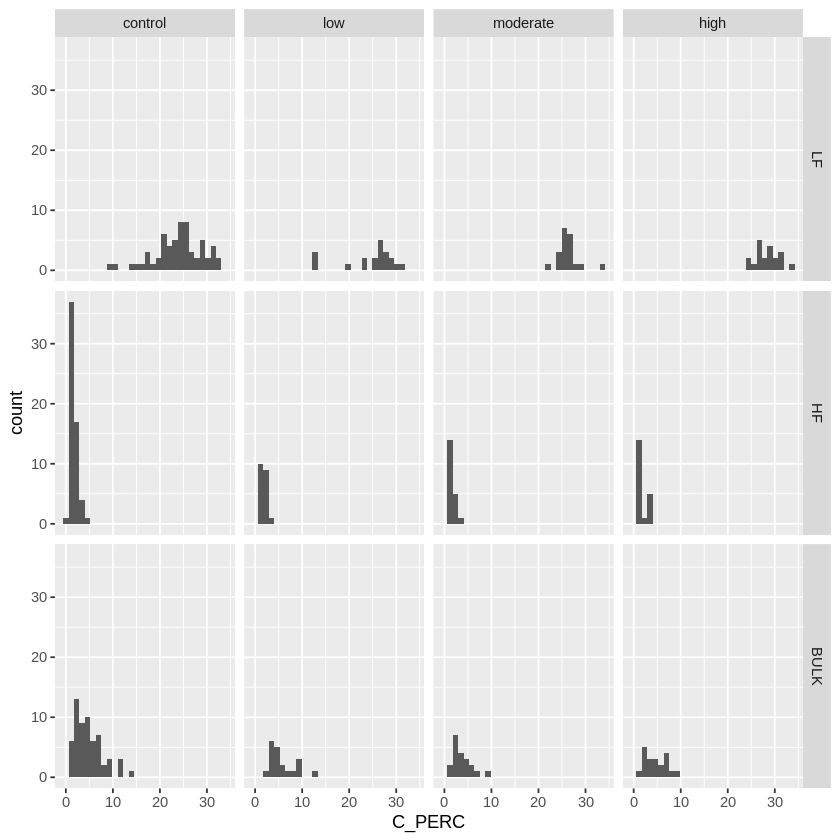

In [41]:
analysis_full_bpca_exp_dt%>%
  ggplot(aes(x=C_PERC))+
    geom_histogram()+
    facet_grid(FRACTION~BURN_SEVERITY)

In [42]:
analysis_full_bpca_exp_dt$DEPTH_Plotting %>% table

.
  0-5 cm  5-10 cm 10-20 cm 20-30 cm 
      90       90       90       90 

In [43]:
# table(analysis_full_bpca_exp_dt$DEPTH,analysis_full_bpca_exp_dt$DEPTH_Plotting)

Standard curves

In [44]:
standards_dt <- fread('/content/standards.csv')

In [45]:
names(standards_dt)

[1] "V1"            "TREATMENT"     "FRACTION"      "DEPTH"        
 [5] "DEPTH_UPPER"   "DEPTH_LOWER"   "SITE"          "BURN_SEVERITY"
 [9] "PA_240_NM"     "PA_216_NM"     "CONC_240"      "CONC_216"     
[13] "CONC_MEAN"     "PEARSONS"

In [46]:
standards_dt[,facet_group := 'Experimental Data']
standards_dt[(TREATMENT %in% 'standard'),facet_group := 'Standards']

standards_dt[,dot_size :=.9]
standards_dt[(TREATMENT %in% 'standard'),dot_size :=1.0]


Call:
lm(formula = CONC_240 ~ CONC_216, data = .)

Residuals:
         1          2          3          4          5          6          7 
-0.0034751 -0.0034744 -0.0031517 -0.0017528 -0.0002361  0.0141387 -0.0020486 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0002074  0.0029062   0.071    0.946    
CONC_216    0.9980875  0.0114844  86.908 3.82e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006947 on 5 degrees of freedom
Multiple R-squared:  0.9993,	Adjusted R-squared:  0.9992 
F-statistic:  7553 on 1 and 5 DF,  p-value: 3.823e-09



Call:
lm(formula = CONC_240 ~ CONC_216, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034267 -0.008184 -0.002559  0.004164  0.062476 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001247   0.002433  -0.513    0.609    
CONC_216     1.058004   0.024426  43.314   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01656 on 125 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9375,	Adjusted R-squared:  0.937 
F-statistic:  1876 on 1 and 125 DF,  p-value: < 2.2e-16


cor
<dbl>
0.9996692


cor
<dbl>
0.9682634


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


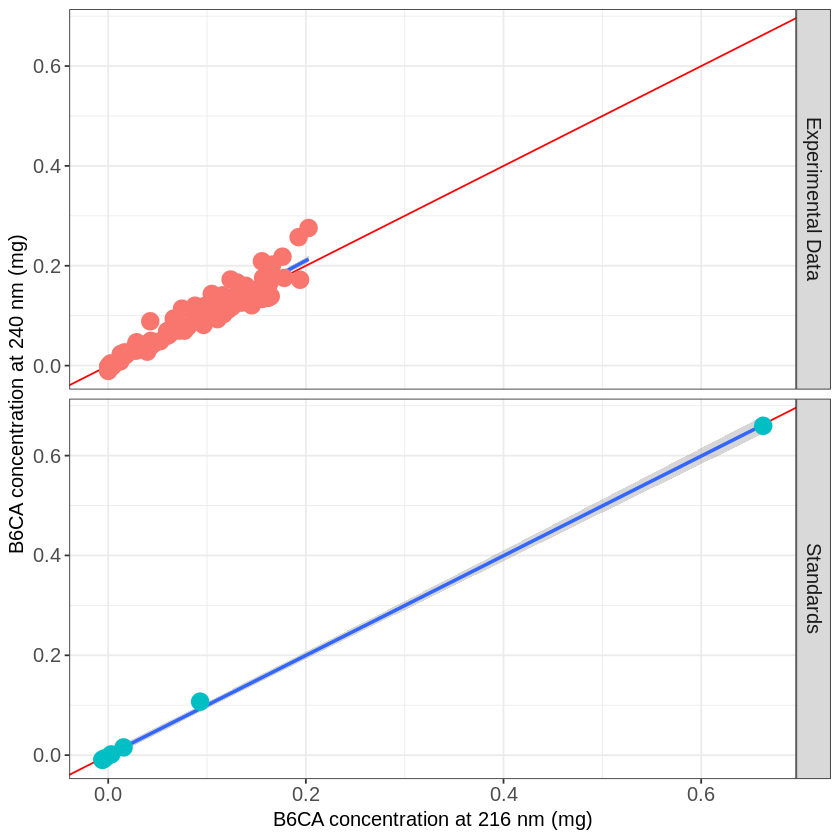

In [47]:
standards_dt[(TREATMENT %in% 'standard')] %>%
  lm(CONC_240~CONC_216,.) %>%
  summary()

standards_dt[!(TREATMENT %in% 'standard')] %>%
  lm(CONC_240~CONC_216,.) %>%
  summary()

standards_dt[(TREATMENT %in% 'standard'),][,list(cor=cor(CONC_240,CONC_216))]

standards_dt[!(TREATMENT %in% 'standard') &!is.na(CONC_240)&!is.na(CONC_216)][,list(cor=cor(CONC_240,CONC_216))]


standards_dt[ ] %>%
  ggplot(aes(x=CONC_216 ,y=CONC_240)) +

  geom_abline(color='red')+
  geom_smooth(method='lm')+
  geom_point(aes(color=facet_group, size = 0.25))+
  theme_bw()+
  theme(
    legend.position = "none",
    text = element_text(size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12)
  ) +
  ylab('B6CA concentration at 240 nm (mg)')+
  xlab('B6CA concentration at 216 nm (mg)')+

  facet_grid(facet_group~.)


Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”


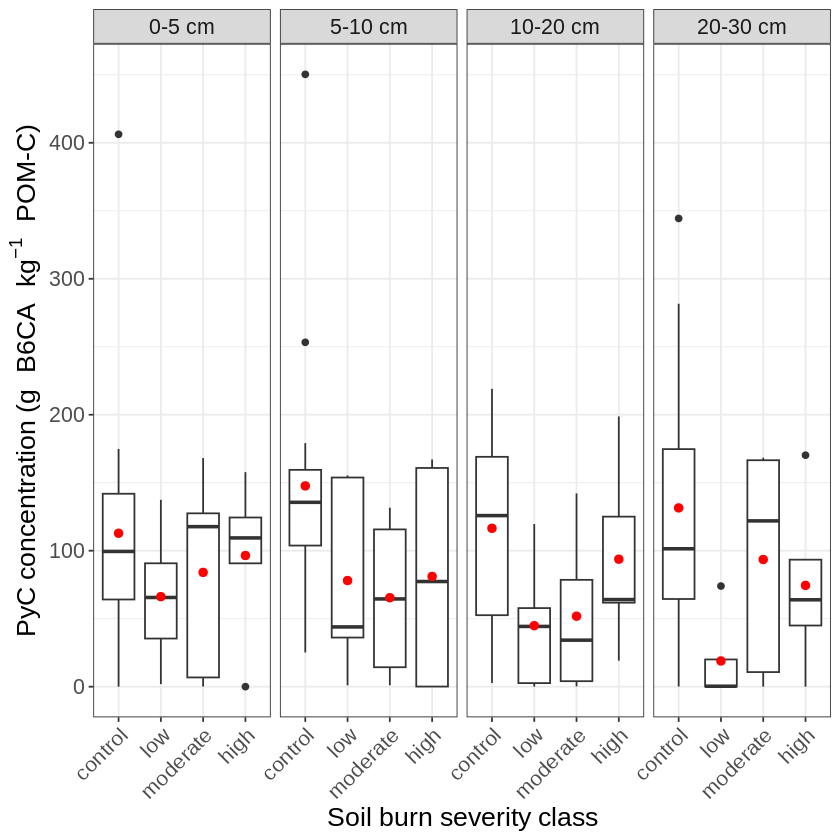

In [194]:

means_data <- analysis_full_bpca_exp_dt[, .(mean = mean(g_PyC_kg_LF_C, na.rm = TRUE)), by = .(BURN_SEVERITY, DEPTH,DEPTH_Plotting)]

#my_comparisons <- list(c(1, 2), c(1, 3), c(1, 4))

# Create the ggplot object with boxplots and means_data points
ggplot(analysis_full_bpca_exp_dt, aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = mean), color = "red", size = 2) +
  facet_grid(. ~ DEPTH_Plotting) +
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~'POM-C'*')')) +
  xlab('Soil burn severity class') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 16))

# Add significance stars with adjusted vertical placement and siz
# p +
#   geom_signif(comparisons = my_comparisons, map_signif_level = TRUE,textsize = 5, step_increase = 0.06)



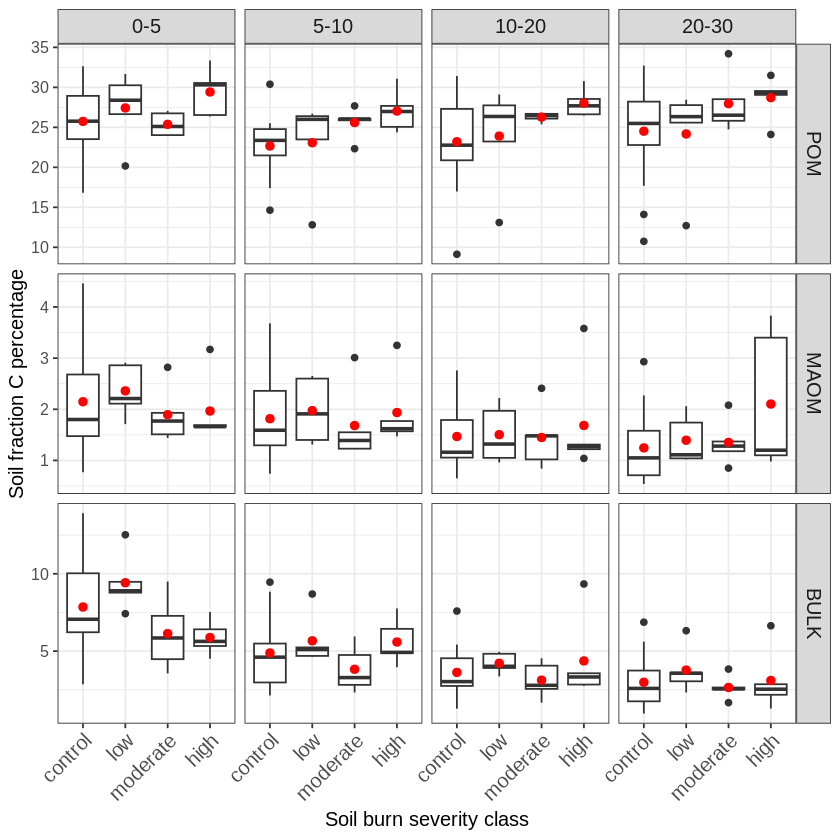

In [49]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(C_PERC = mean(C_PERC, na.rm = TRUE)),
                          by = .(BURN_SEVERITY,FRACTION,DEPTH)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = C_PERC)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = C_PERC), color = "red", size = 2) +
    # geom_signif(aes(),
    #         comparisons = list(c(1, 2), c(1, 3), c(1, 4)),
    #         map_signif_level = TRUE,
    #         textsize=2,
    #         step_increase = 0.05) +
    ylab('Soil fraction C percentage') +
    theme_bw()+
    xlab('Soil burn severity class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1, size=12),
         text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12) )+
    facet_grid(FRACTION~DEPTH,scales = 'free_y', labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM", "BULK" = "BULK")))

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


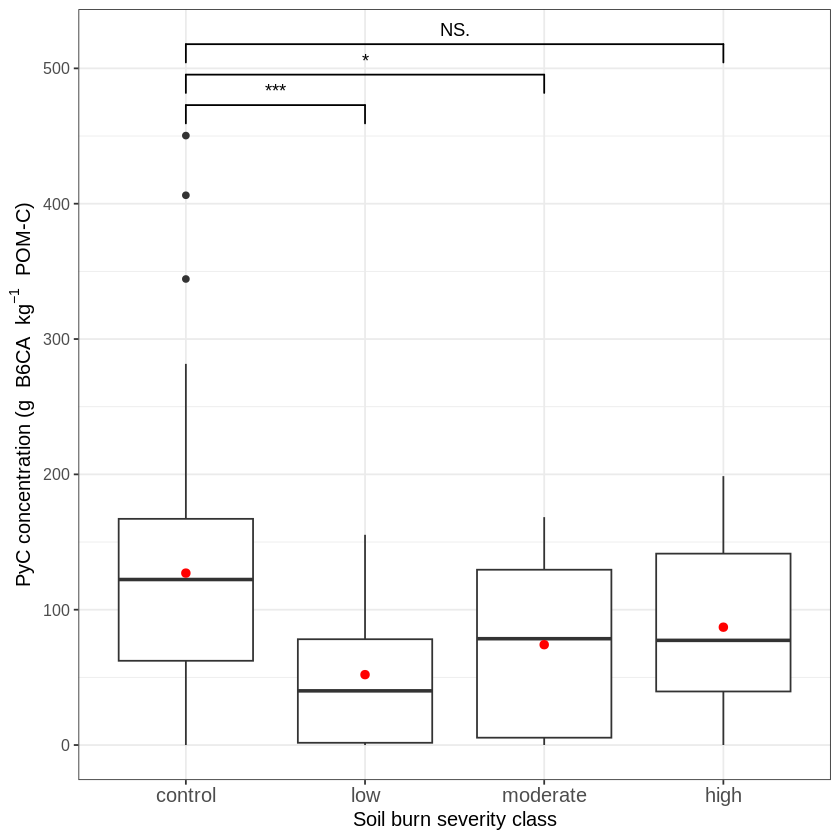

In [50]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(mean = mean(g_PyC_kg_LF_C, na.rm = TRUE)),
                          by = .(BURN_SEVERITY)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = mean), color = "red", size = 2) +
    geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    theme_bw()+
      theme(axis.text.x = element_text(size=12),
         text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12) )+
    ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~'POM-C'*')'))+
    xlab('Soil burn severity class')


Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


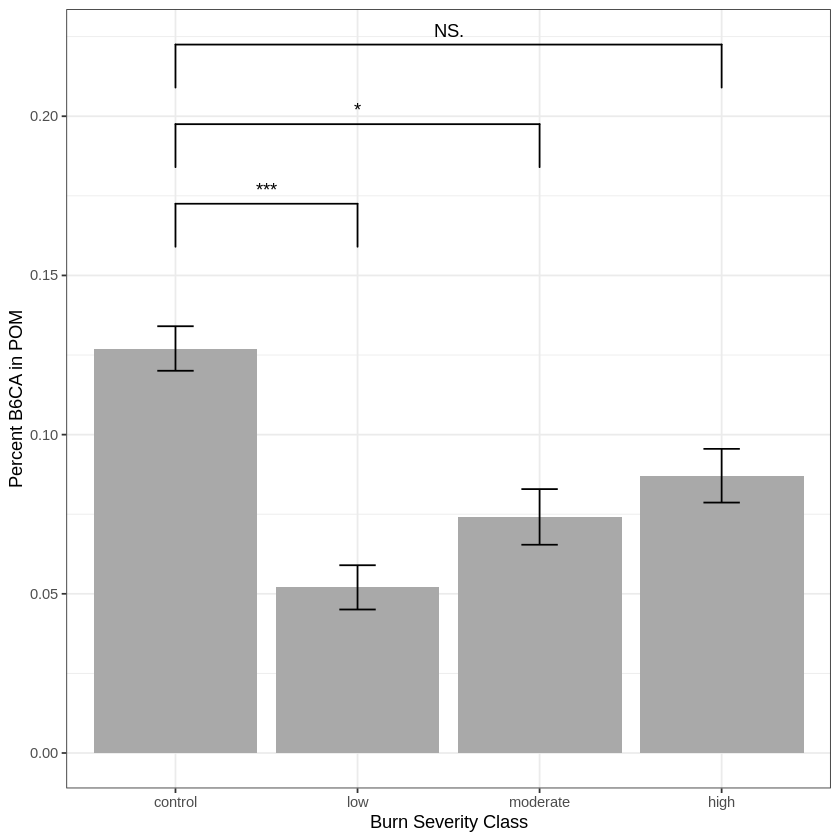

In [51]:
means_data <- analysis_full_bpca_exp_dt[, .(
  per_bpca_carb_lf = mean(per_bpca_carb_lf, na.rm = TRUE) ,
  SE = sd(per_bpca_carb_lf, na.rm = TRUE) / sqrt(.N)
), by = .(BURN_SEVERITY)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = per_bpca_carb_lf)) +
  geom_bar(data=means_data,stat = "identity", fill = "darkgrey") +
  geom_errorbar(data=means_data,
    aes(ymin = per_bpca_carb_lf - SE, ymax = per_bpca_carb_lf + SE),
    width = 0.2,
    position = position_dodge(0.9)
  ) +
  ylab('Percent B6CA in POM') +
  xlab('Burn Severity Class') +
  theme_bw() +
 geom_signif(data=analysis_full_bpca_exp_dt,y_position = c(.15, .175,.2),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE)
  #  geom_signif(
  #   comparisons = list(c("control", "low"), c("moderate", "high")),
  #   map_signif_level = TRUE,
  #   step_increase = 0.05,
  #   textsize = 4
  # )

In [52]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "carbon_stock_fraction"    
[19] "MASS_PROPORTION_RECOVERED" "decayed_mass_kg"          
[21] "total_input"               "burn_decayed_mass_kg"     
[23] "wood_input_rate"           "wood_departure_rate"      
[25] "wood_accumulation_rate"    "years_to_capacity"        
[27] "years_to_recovery"         "fire_count"               
[29] "fire_frequency"            "DEPTH_Plotting"

In [53]:
head(analysis_full_bpca_exp_dt)

SITE,exp_group,FRACTION,DEPTH,BURN_SEVERITY,TREATMENT,DEPTH_UPPER,DEPTH_LOWER,CONC_MEAN,C_PERC,⋯,total_input,burn_decayed_mass_kg,wood_input_rate,wood_departure_rate,wood_accumulation_rate,years_to_capacity,years_to_recovery,fire_count,fire_frequency,DEPTH_Plotting
<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
CH1,H,BULK,0-5,control,control,0,5,NaN,6.61,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,0-5 cm
CH1,H,HF,0-5,control,control,0,5,NaN,1.75,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,0-5 cm
CH1,H,LF,0-5,control,control,0,5,0.05075127,22.17,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,0-5 cm
CH1,H,BULK,10-20,control,control,10,20,NaN,4.17,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,10-20 cm
CH1,H,HF,10-20,control,control,10,20,NaN,1.41,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,10-20 cm
CH1,H,LF,10-20,control,control,10,20,0.15428869,21.28,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,10-20 cm


In [54]:
# means_data <- analysis_full_bpca_exp_dt[ ,
#                           .(mean = mean(g_PyC_kg_LF_C, na.rm = TRUE)),
#                           by = .(BURN_SEVERITY)]

# analysis_full_bpca_exp_dt %>%
# ggplot( aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
#     geom_boxplot( ) +
#     geom_point(data = means_data, aes(y = mean), color = "red", size = 2) +
#     geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
#             map_signif_level=TRUE,step_increase=.05) +
#     theme_bw()+
#       theme(axis.text.x = element_text(size=12),
#          text = element_text(size = 12),
#     axis.title = element_text(size = 12),
#     strip.text = element_text(size = 12) )+
#     ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~'POM-C'*')'))+
#     xlab('Soil burn severity class')

In [55]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "carbon_stock_fraction"    
[19] "MASS_PROPORTION_RECOVERED" "decayed_mass_kg"          
[21] "total_input"               "burn_decayed_mass_kg"     
[23] "wood_input_rate"           "wood_departure_rate"      
[25] "wood_accumulation_rate"    "years_to_capacity"        
[27] "years_to_recovery"         "fire_count"               
[29] "fire_frequency"            "DEPTH_Plotting"

In [86]:
means_data <- analysis_full_bpca_exp_dt[FRACTION=='BULK' & DEPTH=='0-5'][ ,
                          .(mean = mean(wood_departure_rate, na.rm = TRUE)),
                          by = .(BURN_SEVERITY)]

means_data

BURN_SEVERITY,mean
<fct>,<dbl>
control,0.2630282
high,0.1316726
low,0.0677345
moderate,0.1502283


In [87]:
analysis_full_bpca_exp_dt %>% head

SITE,exp_group,FRACTION,DEPTH,BURN_SEVERITY,TREATMENT,DEPTH_UPPER,DEPTH_LOWER,CONC_MEAN,C_PERC,⋯,total_input,burn_decayed_mass_kg,wood_input_rate,wood_departure_rate,wood_accumulation_rate,years_to_capacity,years_to_recovery,fire_count,fire_frequency,DEPTH_Plotting
<chr>,<chr>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
CH1,H,BULK,0-5,control,control,0,5,NaN,6.61,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,0-5 cm
CH1,H,HF,0-5,control,control,0,5,NaN,1.75,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,0-5 cm
CH1,H,LF,0-5,control,control,0,5,0.05075127,22.17,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,0-5 cm
CH1,H,BULK,10-20,control,control,10,20,NaN,4.17,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,10-20 cm
CH1,H,HF,10-20,control,control,10,20,NaN,1.41,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,10-20 cm
CH1,H,LF,10-20,control,control,10,20,0.15428869,21.28,⋯,43.89028,18.91862,1.355192,0.6003913,0.7548002,25.0644,0,NaN,NaN,10-20 cm


BURN_SEVERITY,mean,se
<fct>,<dbl>,<dbl>
control,0.02613118,0.01733391
high,0.81200577,0.07751594
low,0.46994740,0.08688083
moderate,0.59139592,0.10537689


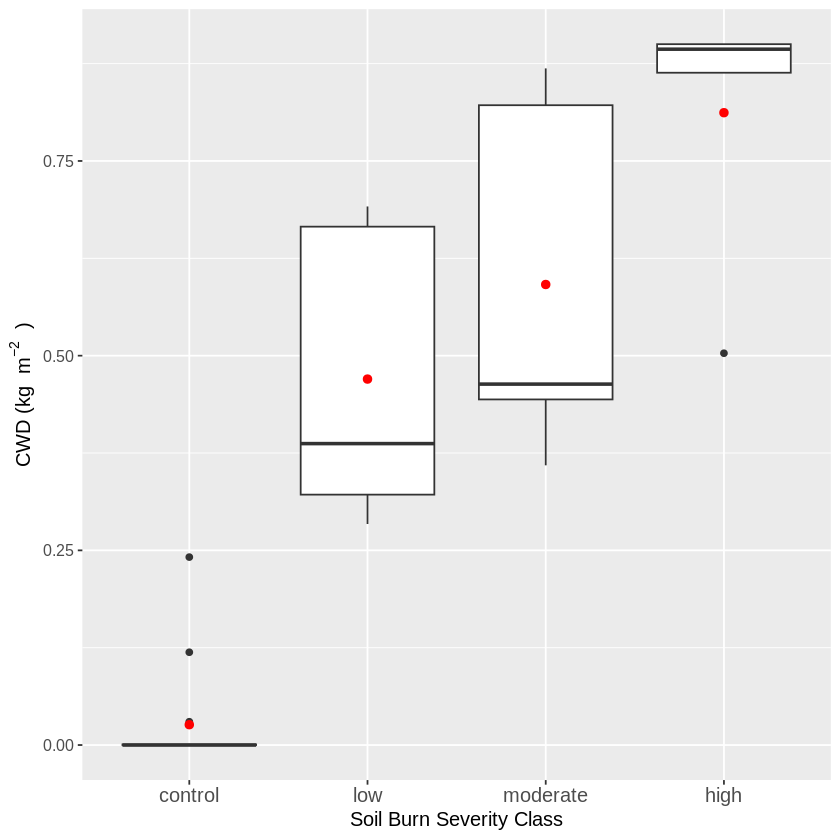

In [94]:
means_data <- analysis_full_bpca_exp_dt[FRACTION == 'BULK' & DEPTH == '0-5',
                                         .(mean = mean((decayed_mass_kg - burn_decayed_mass_kg) / decayed_mass_kg, na.rm = TRUE),
                                           se = sd((decayed_mass_kg - burn_decayed_mass_kg) / decayed_mass_kg, na.rm = TRUE) / sqrt(.N)),
                                         by = .(BURN_SEVERITY)]

means_data

ggplot(analysis_full_bpca_exp_dt[FRACTION=='BULK' & DEPTH=='0-5'],aes(x = BURN_SEVERITY, y = ((decayed_mass_kg - burn_decayed_mass_kg) / decayed_mass_kg))) +
  geom_boxplot() +
   geom_point(data = means_data, aes(y = mean), color = "red", size = 2)+
      # geom_point(  aes(y = total_input), color = "blue", size = 2)+
  ylab(bquote('CWD ('*kg~m^-2~')'))+
  xlab('Soil Burn Severity Class') +
    theme(axis.text.x = element_text(size=12),
         text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12) )+
  # geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
  #           map_signif_level=TRUE,step_increase=.05) +
  coord_cartesian(expand=TRUE)

BURN_SEVERITY,mean,se
<fct>,<dbl>,<dbl>
control,1.032386,0.02233015
high,7.744939,1.51549717
low,2.147086,0.39968062
moderate,3.691230,1.23748216


Warning message in wilcox.test.default(c(1, 1.31810471189353, 1, 1, 1, 1, 1, 1, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1, 1.31810471189353, 1, 1, 1, 1, 1, 1, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1, 1.31810471189353, 1, 1, 1, 1, 1, 1, :
“cannot compute exact p-value with ties”


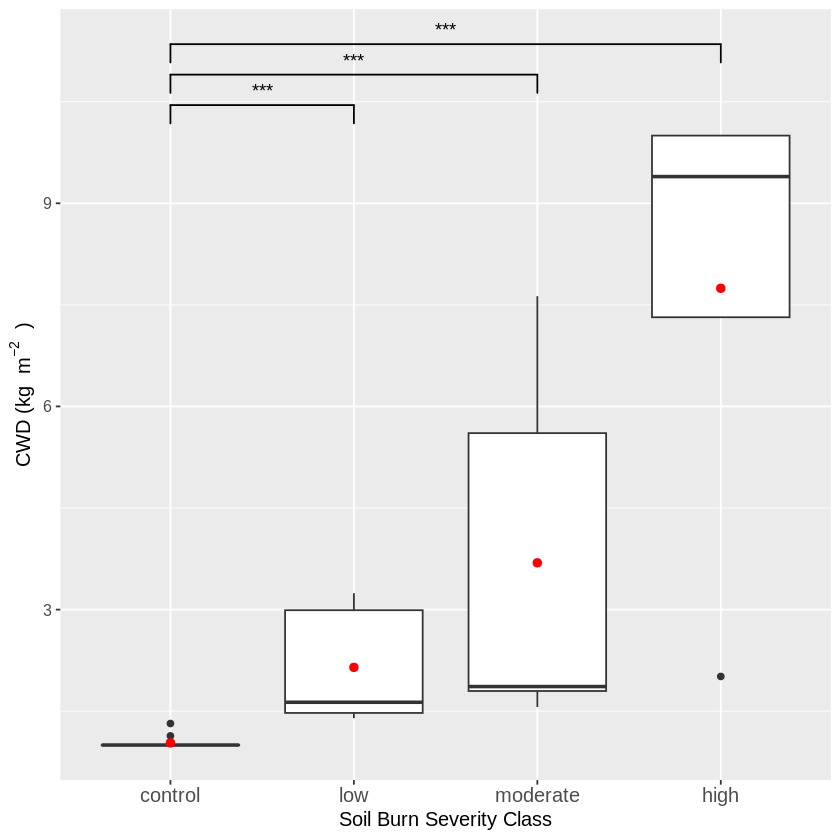

In [83]:
means_data <- analysis_full_bpca_exp_dt[FRACTION == 'BULK' & DEPTH == '0-5',
                                         .(mean = mean(decayed_mass_kg / burn_decayed_mass_kg, na.rm = TRUE),
                                           se = sd(decayed_mass_kg / burn_decayed_mass_kg, na.rm = TRUE) / sqrt(.N)),
                                         by = .(BURN_SEVERITY)]

means_data

ggplot(analysis_full_bpca_exp_dt[FRACTION=='BULK' & DEPTH=='0-5'],aes(x = BURN_SEVERITY, y = decayed_mass_kg/burn_decayed_mass_kg)) +
  geom_boxplot() +
   geom_point(data = means_data, aes(y = mean), color = "red", size = 2)+
      # geom_point(  aes(y = total_input), color = "blue", size = 2)+
  ylab(bquote('CWD ('*kg~m^-2~')'))+
  xlab('Soil Burn Severity Class') +
    theme(axis.text.x = element_text(size=12),
         text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12) )+
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  coord_cartesian(expand=TRUE)

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


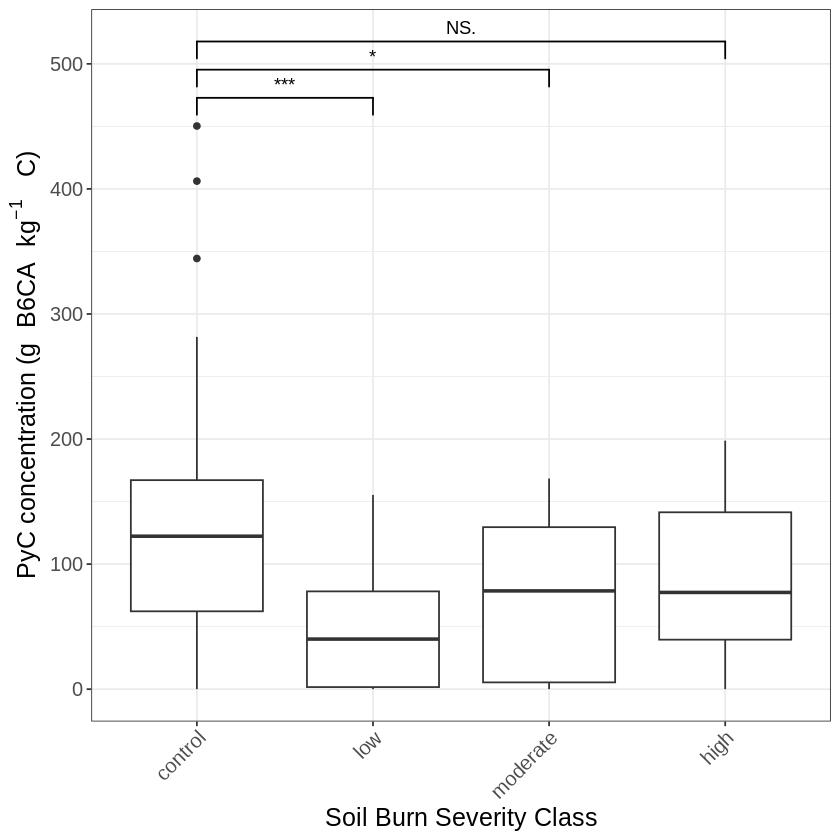

In [57]:
ggplot(analysis_full_bpca_exp_dt,aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  # facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”


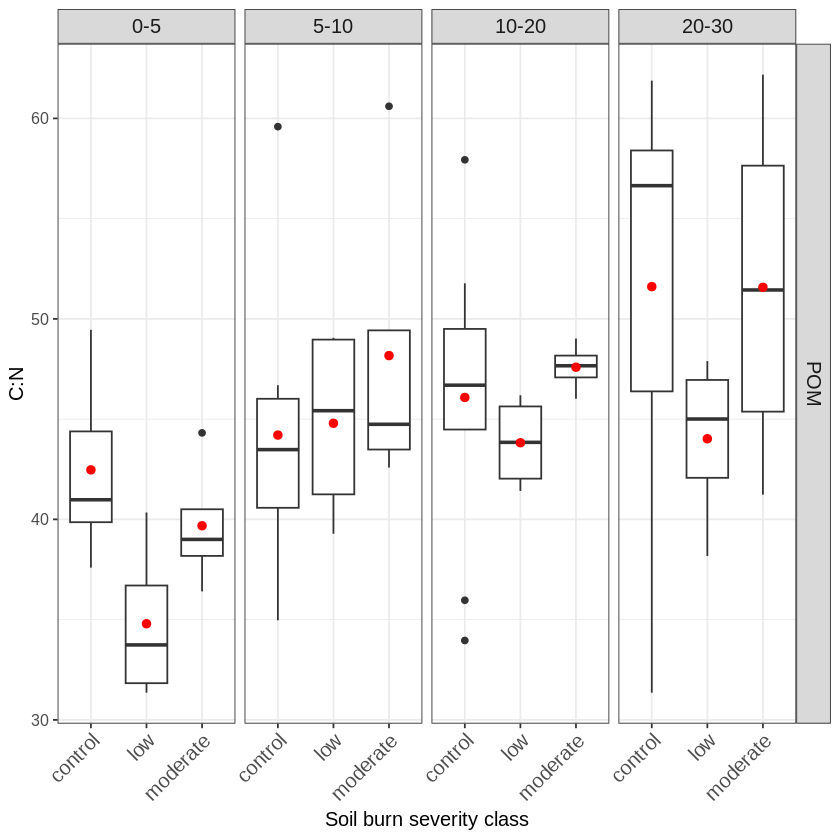

In [58]:


# Filter and clean data
cleaned_data <- analysis_full_bpca_exp_dt[complete.cases(analysis_full_bpca_exp_dt), ]
subset_data <- cleaned_data[cleaned_data$C_N < 200, ]

# Calculate means
means_data <- subset_data[, .(C_N = mean(C_N)), by = .(BURN_SEVERITY, FRACTION, DEPTH)]

# Calculate pairwise t-test p-values
depth_groups <- unique(subset_data$DEPTH)
significant_comparisons <- lapply(depth_groups, function(depth) {
  subgroup <- subset(subset_data, DEPTH == depth)
  p_values <- pairwise.t.test(subgroup$C_N, subgroup$BURN_SEVERITY)$p.value < 0.05
  return(p_values)
})

names(significant_comparisons) <- depth_groups

# Plot with significance stars for significant comparisons
ggplot(subset_data, aes(x = BURN_SEVERITY, y = C_N)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = C_N), color = "red", size = 2) +
  ylab('C:N') +
  geom_signif(comparisons = significant_comparisons,
              map_signif_level = TRUE,
              step_increase = 0.05,
              textsize = 5) +  # Adjust text size as needed
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12)
  ) +
  facet_grid(FRACTION ~ DEPTH, scales = 'free_y', labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM", "BULK" = "BULK"))) +
  xlab('Soil burn severity class')





In [59]:
analysis_full_bpca_exp_dt %>% names

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "carbon_stock_fraction"    
[19] "MASS_PROPORTION_RECOVERED" "decayed_mass_kg"          
[21] "total_input"               "burn_decayed_mass_kg"     
[23] "wood_input_rate"           "wood_departure_rate"      
[25] "wood_accumulation_rate"    "years_to_capacity"        
[27] "years_to_recovery"         "fire_count"               
[29] "fire_frequency"            "DEPTH_Plotting"

Warning message in wilcox.test.default(c(12.2307692307692, 14.6315789473684, 13.0526315789474, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.2307692307692, 14.6315789473684, 13.0526315789474, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.2307692307692, 14.6315789473684, 13.0526315789474, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.0769230769231, 11.6666666666667, 6.75, :
“cannot compute exact p-value with ties”


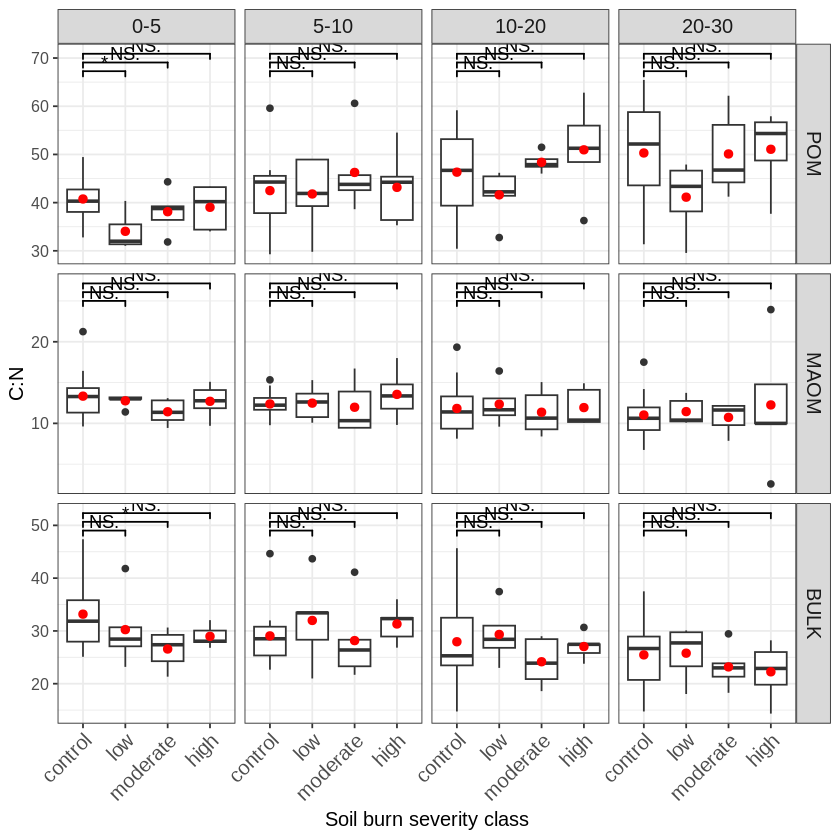

In [60]:
# Remove rows where C_N > 30 in HF fraction and C_N > 200 in LF fraction
cleaned_data <- analysis_full_bpca_exp_dt[!(FRACTION == 'HF' & C_N > 30) & !(FRACTION == 'LF' & C_N > 200)]

# Calculate means_data based on the cleaned dataset
means_data <- cleaned_data[C_N < 200,
                           .(C_N = mean(C_N, na.rm = TRUE)),
                           by = .(BURN_SEVERITY, FRACTION, DEPTH)]

# Create the plot using the cleaned data
cleaned_data %>%
  ggplot(aes(x = BURN_SEVERITY, y = C_N)) +
    geom_boxplot() +
    geom_point(data = means_data, aes(y = C_N), color = "red", size = 2) +
    ylab('C:N') +
    geom_signif(aes(), comparisons = list(c(1,2), c(1,3), c(1,4)),
                map_signif_level = TRUE, step_increase = 0.05) +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          text = element_text(size = 12),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 12)) +
    facet_grid(FRACTION ~ DEPTH, scales = 'free_y',
               labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM", "BULK" = "BULK"))) +
    xlab('Soil burn severity class')




In [61]:
analysis_full_bpca_exp_dt %>% names

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "carbon_stock_fraction"    
[19] "MASS_PROPORTION_RECOVERED" "decayed_mass_kg"          
[21] "total_input"               "burn_decayed_mass_kg"     
[23] "wood_input_rate"           "wood_departure_rate"      
[25] "wood_accumulation_rate"    "years_to_capacity"        
[27] "years_to_recovery"         "fire_count"               
[29] "fire_frequency"            "DEPTH_Plotting"

In [62]:
#analysis_full_bpca_exp_dt[,.(LFC := C_PERC * MASS_PROPORTION_RECOVERED)]

In [63]:
selected_columns <- c("SITE", "FRACTION", "DEPTH", "carbon_stock",'BURN_SEVERITY')

filtered_data <- analysis_full_bpca_exp_dt[!is.nan(carbon_stock)]

#summary_table <- filtered_data[, .(total_carbon_stock = sum(carbon_stock, na.rm = TRUE),
summary_table <- filtered_data[, .(total_carbon_stock = mean(carbon_stock, na.rm = TRUE),
                                   se_carbon_stock = sd(carbon_stock, na.rm = TRUE) / sqrt(.N)),
                               by = .(FRACTION, DEPTH, BURN_SEVERITY)]

print(summary_table)

    FRACTION DEPTH BURN_SEVERITY total_carbon_stock se_carbon_stock
 1:     BULK   0-5       control          13.976333       1.6400912
 2:       HF   0-5       control           3.698933       0.4226102
 3:       LF   0-5       control          45.648033       2.9780103
 4:     BULK 10-20       control          16.640333       2.1948124
 5:       HF 10-20       control           6.685533       0.8514847
 6:       LF 10-20       control         105.687667       8.3204328
 7:     BULK 20-30       control          16.930867       2.9328115
 8:       HF 20-30       control           6.874800       1.0191091
 9:       LF 20-30       control         136.327533      12.9046429
10:     BULK  5-10       control           8.999200       1.2052485
11:       HF  5-10       control           3.355833       0.4376645
12:       LF  5-10       control          41.110233       1.8871748
13:     BULK   0-5          high          10.195100       0.9416703
14:       HF   0-5          high           3.407

In [64]:
# selected_columns <- c("SITE", "FRACTION", "DEPTH", "carbon_stock",'BURN_SEVERITY')

# filtered_data <- analysis_full_bpca_exp_dt[!is.nan(carbon_stock)]

# # Summarize the data using data.table
# summary_table <- filtered_data[, .(total_carbon_stock = sum(carbon_stock, na.rm = TRUE)),
#                                by = .(FRACTION, DEPTH, BURN_SEVERITY)]

# # Print the summary table
# print(summary_table)

In [65]:
bulk_data <- summary_table[FRACTION == "POM"]

anova_result <- aov(lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))
print(anova_result)

tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

Call:
   aov(formula = lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))

Terms:
                BURN_SEVERITY Residuals
Sum of Squares          80.32  71874.23
Deg. of Freedom             3        44

Residual standard error: 40.41664
Estimated effects may be unbalanced
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))

$BURN_SEVERITY
                       diff       lwr      upr     p adj
low-control      -1.1612083 -45.21637 42.89395 0.9998729
moderate-control -2.8414833 -46.89665 41.21368 0.9981566
high-control     -3.2001667 -47.25533 40.85500 0.9973750
moderate-low     -1.6802750 -45.73544 42.37489 0.9996159
high-low         -2.0389583 -46.09412 42.01620 0.9993150
high-moderate    -0.3586833 -44.41385 43.69648 0.9999962



In [66]:
# # Fit your linear model
# model <- lm(DV ~ IV1 + IV2 + IV3, data = your_data)

# # Perform Type II ANOVA
# # Anova() function from the car package allows you to specify the type of sum of squares
# # In this case, we use type = 2
# anova_result <- Anova(model, type = 2)

# # Print the ANOVA table
# print(anova_result)

In [67]:
bulk_data <- summary_table[FRACTION == "BULK"]

anova_result <- aov(lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))
print(anova_result)

tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

Call:
   aov(formula = lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))

Terms:
                BURN_SEVERITY Residuals
Sum of Squares          80.32  71874.23
Deg. of Freedom             3        44

Residual standard error: 40.41664
Estimated effects may be unbalanced
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))

$BURN_SEVERITY
                       diff       lwr      upr     p adj
low-control      -1.1612083 -45.21637 42.89395 0.9998729
moderate-control -2.8414833 -46.89665 41.21368 0.9981566
high-control     -3.2001667 -47.25533 40.85500 0.9973750
moderate-low     -1.6802750 -45.73544 42.37489 0.9996159
high-low         -2.0389583 -46.09412 42.01620 0.9993150
high-moderate    -0.3586833 -44.41385 43.69648 0.9999962



In [68]:

anova_result <- aov(carbon_stock ~ DEPTH * BURN_SEVERITY, data = filtered_data)

# Print ANOVA summary
summary(anova_result)

tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

                     Df Sum Sq Mean Sq F value   Pr(>F)    
DEPTH                 3  66895   22298  13.585 2.14e-08 ***
BURN_SEVERITY         3    661     220   0.134     0.94    
DEPTH:BURN_SEVERITY   9   1161     129   0.079     1.00    
Residuals           344 564618    1641                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = carbon_stock ~ DEPTH * BURN_SEVERITY, data = filtered_data)

$DEPTH
                 diff        lwr      upr     p adj
5-10-0-5    -2.721572 -18.313015 12.86987 0.9694749
10-20-0-5   21.437989   5.846546 37.02943 0.0024693
20-30-0-5   29.131311  13.539868 44.72275 0.0000126
10-20-5-10  24.159561   8.568118 39.75100 0.0004485
20-30-5-10  31.852883  16.261440 47.44433 0.0000014
20-30-10-20  7.693322  -7.898121 23.28477 0.5802218

$BURN_SEVERITY
                       diff       lwr      upr     p adj
low-control      -1.1612083 -16.75265 14.43023 0.9974769
moderate-control -2.8414833 -18.43293 12.74996 0.9654950
high-control     -3.2001667 -18.79161 12.39128 0.9517820
moderate-low     -1.6802750 -20.77582 17.41527 0.9958617
high-low         -2.0389583 -21.13450 17.05658 0.9926731
high-moderate    -0.3586833 -19.45422 18.73686 0.9999590

$`DEPTH:BURN_SEVERITY`
                                  

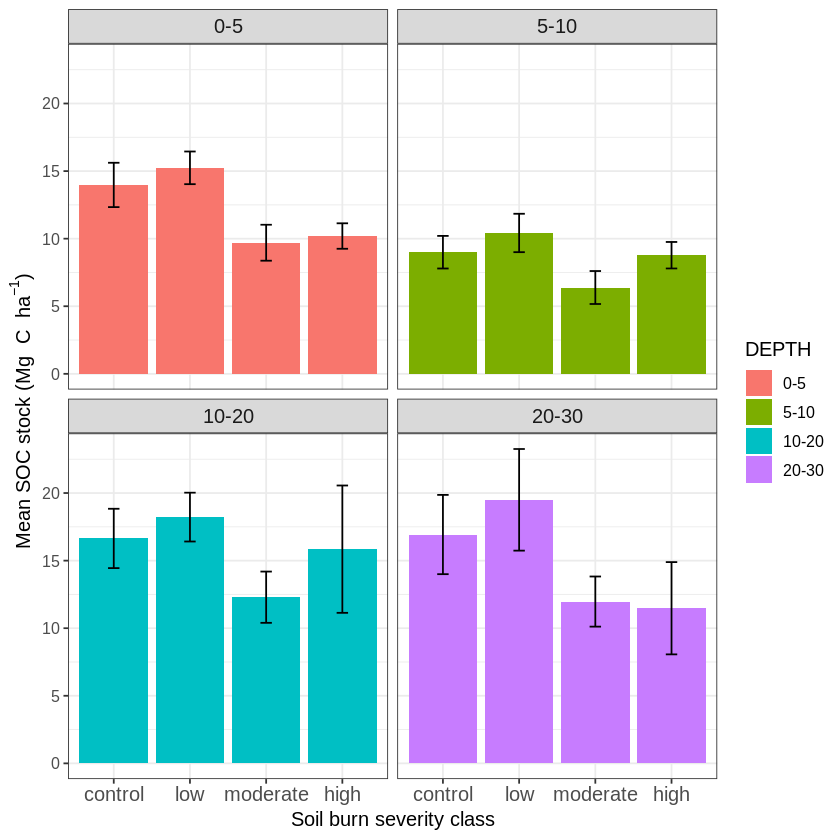

In [69]:
# Calculate means and standard errors
summary_data <- analysis_full_bpca_exp_dt[, .(
  mean_carbon_stock = mean(carbon_stock, na.rm = TRUE),
  se_carbon_stock = sd(carbon_stock, na.rm = TRUE) / sqrt(.N)  # Calculate standard error
), by = .(BURN_SEVERITY, FRACTION, DEPTH)]

summary_data[order(DEPTH) %>% rev, mean_carbon_stock_cum_sum := cumsum(mean_carbon_stock), by = .(BURN_SEVERITY, FRACTION)]

# Plot with standard error bars
bulk_data <- summary_data[FRACTION == 'BULK']

ggplot(bulk_data, aes(x = BURN_SEVERITY, y = mean_carbon_stock, fill = DEPTH,group=DEPTH)) +
  geom_bar(stat = "identity") +
  geom_errorbar(
    aes(ymin = mean_carbon_stock - se_carbon_stock, ymax = mean_carbon_stock + se_carbon_stock),
    width = 0.15
  ) +
  ylab(bquote('Mean SOC stock (' * Mg ~ 'C' ~ ha^-1 * ')')) +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = 12),
    text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12)
  ) +
  xlab('Soil burn severity class')+
  facet_wrap(.~DEPTH)


In [70]:
summary_data$DEPTH %>% unique

[1] 0-5   10-20 20-30 5-10 
Levels: 0-5 5-10 10-20 20-30

In [71]:
analysis_full_bpca_exp_dt$DEPTH %>% levels

[1] "0-5"   "5-10"  "10-20" "20-30"

In [72]:
t_tests_carbon_stock_fraction_dt[,exp_se:=exp_sd/sqrt(exp_n)]
t_tests_carbon_stock_fraction_dt[,control_se:=control_sd/sqrt(control_n)]
t_tests_carbon_stock_fraction_dt[order(p)]

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group,exp_se,control_se
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>
LF,carbon_stock_fraction,0-5,0.01764990,10.004559,5.508930,15,5.860459,1.5684152,5,M,0.7014166,1.4223997
LF,carbon_stock_fraction,10-20,0.07325616,8.622457,5.251158,15,16.848325,7.6789357,5,H,3.4341244,1.3558432
LF,carbon_stock_fraction,5-10,0.27155765,5.135645,3.328285,15,6.961742,2.8719108,5,L,1.2843575,0.8593594
LF,carbon_stock_fraction,10-20,0.37377379,8.622457,5.251158,15,6.748863,3.3532254,5,M,1.4996080,1.3558432
LF,carbon_stock_fraction,5-10,0.40082157,5.135645,3.328285,15,6.043083,1.3595447,5,H,0.6080069,0.8593594
HF,carbon_stock_fraction,5-10,0.41106188,2.868043,1.215919,15,2.484677,0.7215592,5,H,0.3226911,0.3139490
LF,carbon_stock_fraction,0-5,0.44432420,10.004559,5.508930,15,11.982047,4.4985602,5,L,2.0118173,1.4223997
LF,carbon_stock_fraction,0-5,0.46242670,10.004559,5.508930,15,8.385001,3.5368923,5,H,1.5817463,1.4223997
HF,carbon_stock_fraction,10-20,0.52890118,5.931016,2.762686,15,5.142537,2.1653451,5,M,0.9683718,0.7133226


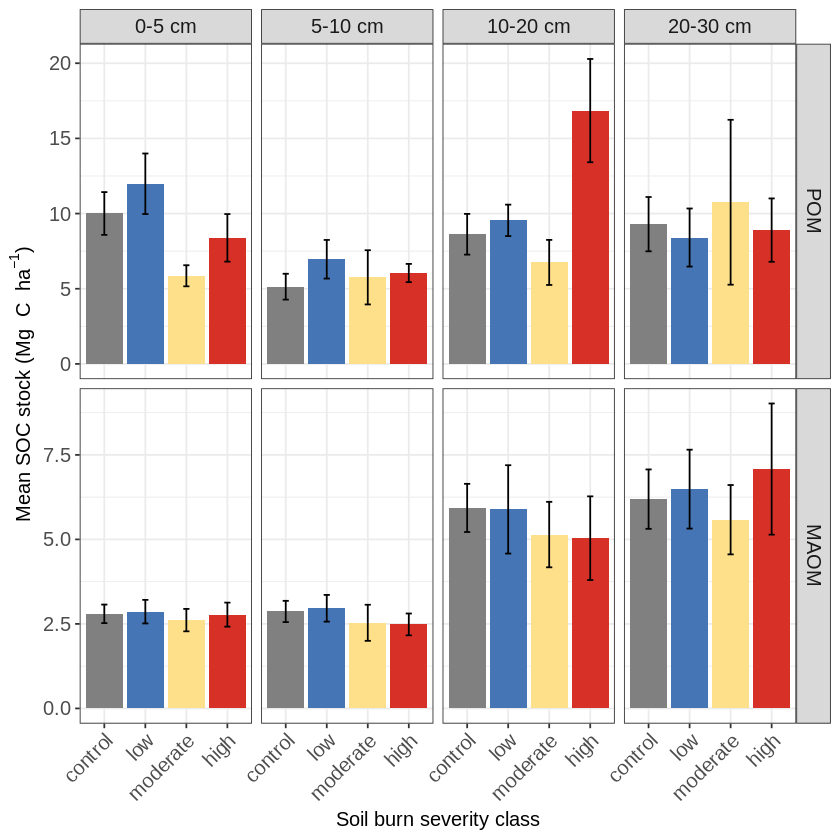

In [73]:
summary_data <- analysis_full_bpca_exp_dt[, .(
  carbon_stock_fraction = mean(carbon_stock_fraction, na.rm = TRUE),
  se_carbon_stock = sd(carbon_stock_fraction, na.rm = TRUE) / sqrt(.N)  # Calculate standard error
), by = .(BURN_SEVERITY, FRACTION, DEPTH,DEPTH_Plotting)]

summary_data[order(DEPTH) %>% rev, carbon_stock_fraction_cum_sum := cumsum(carbon_stock_fraction), by = .(BURN_SEVERITY, FRACTION)]

fraction_data <- summary_data[FRACTION != 'BULK']

#custom_colors <- c('#2b83ba', '#159501', '#f4f40e', '#e81919')
#custom_colors <- c('#185172','#0e6a00','#b1b107','#a30c0c')
#custom_colors <- c('#1f78b4', '#33a02c', '#a6cee3', '#e31a1c')
custom_colors <- c('#808080', '#4575b4','#fee08b', '#d73027')

ggplot(data=analysis_full_bpca_exp_dt[FRACTION != 'BULK'], aes(x = BURN_SEVERITY, y = carbon_stock_fraction, fill = BURN_SEVERITY, group = FRACTION)) +
  geom_bar(data=fraction_data,stat = "identity") +
  geom_errorbar(data=fraction_data,
    aes(ymin = carbon_stock_fraction - se_carbon_stock, ymax = carbon_stock_fraction + se_carbon_stock),
    width = 0.15
  ) +
  ylab(bquote('Mean SOC stock (' * Mg ~ 'C' ~ ha^-1 * ')')) +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1, vjust = 1),
    legend.text = element_text(size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
     strip.text = element_text(size = 12)
  ) +
      facet_grid(FRACTION ~ DEPTH_Plotting,scales='free',
    labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM")))+
  xlab('Soil burn severity class') +
  scale_fill_manual(values = custom_colors) +
  theme(legend.position = 'none')

Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to i

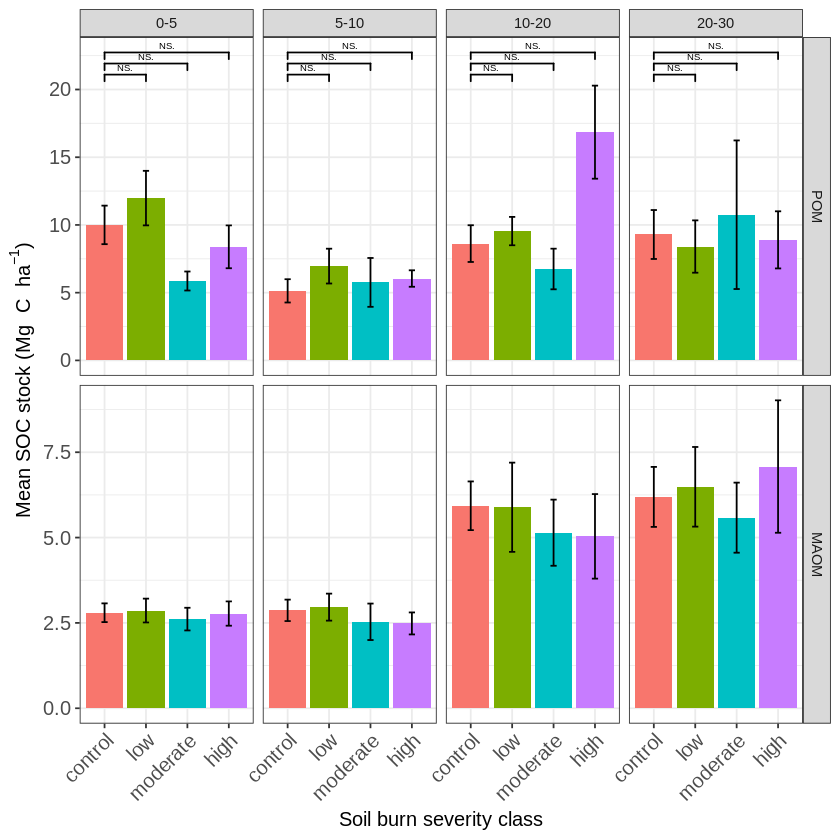

In [74]:
# Calculate means and standard errors
summary_data <- analysis_full_bpca_exp_dt[, .(
  carbon_stock_fraction = mean(carbon_stock_fraction, na.rm = TRUE),
  se_carbon_stock = sd(carbon_stock_fraction, na.rm = TRUE) / sqrt(.N)  # Calculate standard error
), by = .(BURN_SEVERITY, FRACTION, DEPTH)]

summary_data[order(DEPTH) %>% rev, carbon_stock_fraction_cum_sum := cumsum(carbon_stock_fraction), by = .(BURN_SEVERITY, FRACTION)]

fraction_data <- summary_data[FRACTION != 'BULK']
ggplot(fraction_data, aes(x = BURN_SEVERITY, y = carbon_stock_fraction, fill = BURN_SEVERITY ,group=FRACTION)) +
  geom_bar(stat = "identity") +
  geom_errorbar(
    aes(ymin = carbon_stock_fraction - se_carbon_stock, ymax = carbon_stock_fraction + se_carbon_stock),
    width = 0.15
  ) +
  ylab(bquote('Mean SOC stock (' * Mg ~ 'C' ~ ha^-1 * ')')) +
  theme_bw() +
  theme(
  axis.text.x = element_text(size = 12, angle = 45, hjust = 1, vjust = 1),
  legend.text=element_text(size=12),
  axis.text=element_text(size=12),
  axis.title=element_text(size=12),
  ) +
        geom_signif(aes(),
            comparisons = list(c(1, 2), c(1, 3), c(1, 4)),
            map_signif_level = TRUE,
            textsize=2,
            step_increase = 0.05) +
  xlab('Soil burn severity class')+
  facet_grid(FRACTION ~ DEPTH, scales = 'free',
labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM"))) +
  theme(legend.position = 'none')


#scale_fill_manual(values = c('#2b83ba', '#159501', '#f4f40e','#e81919')

In [75]:
install.packages('cowplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [76]:
# Calculate means and standard errors
summary_data <- analysis_full_bpca_exp_dt[, .(
  carbon_stock_fraction = mean(carbon_stock_fraction, na.rm = TRUE),
  se_carbon_stock = sd(carbon_stock_fraction, na.rm = TRUE) / sqrt(.N)  # Calculate standard error
), by = .(BURN_SEVERITY, FRACTION, DEPTH)]

summary_data[order(DEPTH) %>% rev, carbon_stock_fraction_cum_sum := cumsum(carbon_stock_fraction), by = .(BURN_SEVERITY, FRACTION)]

# Plot with standard error bars
fraction_data <- summary_data[FRACTION != 'BULK']
right_panel <-
ggplot(fraction_data, aes(x = interaction(FRACTION,BURN_SEVERITY), y = carbon_stock_fraction,fill=DEPTH,group=DEPTH)) +
  geom_bar(stat = "identity") +
  # geom_errorbar(
  #   aes(ymin = carbon_stock_fraction - se_carbon_stock, ymax = carbon_stock_fraction + se_carbon_stock),
  #   width = 0.15
  # ) +
  ylab(bquote('Mean SOC stock (' * Mg ~ 'C' ~ ha^-1 * ')')) +
  theme_bw() +
  # theme(
  #   axis.text.x = element_text(size = 12),
  #   text = element_text(size = 12),
  #   axis.title = element_text(size = 12),
  #   strip.text = element_text(size = 12)
  # ) +
theme(
  axis.text.x = element_text(size = 8, angle = 45, hjust = 1, vjust = 1),
  legend.text=element_text(size=8),
  axis.text=element_text(size=8),
  axis.title=element_text(size=8),
  legend.position="top")+
  xlab('Soil burn severity class')+
  facet_grid(.~.,scales = 'free')


In [77]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [78]:
# legend_b <- get_legend(right_panel + theme(legend.position="top"))

# title <- ggdraw() + draw_label("Conditions for site 05430175", fontface='bold')
# # annual_cumulative_respiration
#  nice_plot <- plot_grid(left_plot,right_panel,
#                         ncol = 2,
#                         rel_heights = c(.75,.5),
#                         labels = "",
#                         align = 'h',
#                         axis = "t")
# nice_plot

In [79]:
ggsave("/content/multiplot_carbonstock.jpg" ,
 width = 9,
  height = 6,
  units ='in',
  scale = 1.75)

In [80]:
# Perform Welch's ANOVA
welch_anova_result <- oneway.test(total_carbon_stock ~ BURN_SEVERITY, data = bulk_data, var.equal = FALSE)

# Print the Welch's ANOVA results
print(welch_anova_result)

# Perform Games-Howell post hoc test
games_howell_result <- pairwise.wilcox.test(bulk_data$total_carbon_stock, bulk_data$BURN_SEVERITY, p.adjust.method = "holm")

# Print the Games-Howell results
print(games_howell_result)

ERROR: Error in eval(predvars, data, env): object 'total_carbon_stock' not found


In [ ]:
summary_data[order(DEPTH) %>% rev, mean_carbon_stock_cum_sum := cumsum(mean_carbon_stock), by = .(BURN_SEVERITY, FRACTION)] %>% print

In [ ]:
summary_data[order(DEPTH) %>% rev,mean_carbon_stock_cum_sum :=cumsum(mean_carbon_stock),by=.(BURN_SEVERITY,FRACTION)]

In [ ]:
#model <- lm(bpca_conc_240_per * 1000 ~ count, data = events_dt) %>% print
#rsquared <- summary(model)$r.squared %>% print

In [ ]:
analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &DEPTH =='0-5'] %>% names

In [ ]:
model <- lm(g_PyC_kg_LF_C ~ fire_count, data = analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2])%>% print
rsquared <- summary(model)$r.squared %>% print

In [ ]:
# full_bpca_exp_dt$DEPTH_UPPER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[1]}) %>% unlist %>% as.numeric
# full_bpca_exp_dt$DEPTH_LOWER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[2]}) %>% unlist %>% as.numeric
# full_bpca_exp_dt[,mg_ml_bpca := (CONC_MEAN/BPCA_STARTING_MASS_MG) ]
# full_bpca_exp_dt[,g_kg_bpca_lf := MASS_PROPORTION_RECOVERED*mg_ml_bpca,by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,C_N := C_PERC/N_PERC,by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,carbon_stock:= (DEPTH_LOWER %>% as.numeric - DEPTH_UPPER%>% as.numeric )*((BULKD %>% as.numeric ))*(C_PERC/100)*100]
# full_bpca_exp_dt[BURN_SEVERITY!='control',TREATMENT := 'treatment']
# full_bpca_exp_dt[BURN_SEVERITY=='control',TREATMENT := 'control']
# full_bpca_exp_dt[ ,TREATMENT := 'control']
# full_bpca_exp_dt[,exp_group:= SITE %>% gsub('C','',.) %>% substr(1,1)]

In [ ]:
analysis_full_bpca_exp_dt %>% names

In [ ]:
# analysis_full_bpca_exp_dt$g_PyC_kg_LF_C %>% qplot

In [ ]:
analysis_full_bpca_exp_dt[!is.na(fire_count) & FRACTION == 'LF' & !(DEPTH %in% c('0-5', '5-10')) & fire_count > 2][, list(g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C)), by = .(SITE, fire_count, fire_frequency, BURN_SEVERITY)] %>%
  ggplot(aes(y = g_PyC_kg_LF_C, x = fire_count)) +
  geom_smooth(method = 'lm',
              se = TRUE,
              colour = 'darkgray',
              fill = 'lightgray') +
  geom_point(aes(color = BURN_SEVERITY, fill = BURN_SEVERITY), size = 3, shape = 21, color = 'black') +
  theme_classic() +
  theme(legend.position = c(.2, .85), text = element_text(size = 13),
                  axis.text = element_text(size = 12),
                   legend.box.margin = margin(5, 5, 5, 5),
    legend.box.background = element_rect(color = 'black', size = 1)
  ) +
  guides(color = guide_legend(
    title.position = 'top',
    keywidth = 0.7,
    keyheight = 0.7,
    label.position = 'bottom',
    ncol = 1,
    byrow = TRUE
  )) +
  scale_fill_manual(values = c('#2b83ba', '#159501', '#f4f40e'),
                    name = 'Holiday Farm Fire\nSoil Burn Severity',
                    labels = c('unburned', 'low', 'moderate')) +
  ylab(bquote('Mean PyC concentration in subsoil (' * g ~ 'B6CA' ~ kg^-1 ~ 'POM-C' * ')')) +
  xlab('Count of fires since 1800')



In [ ]:
#'whitesmoke'
analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2][,list(g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
 # lm(fire_count~g_PyC_kg_LF_C,.) %>%
   lm(g_PyC_kg_LF_C~fire_count,.) %>%
  summary()

analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2][,list(g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
ggplot(aes(y = g_PyC_kg_LF_C, x = fire_count)) +
  geom_smooth(method = 'lm',
              se = TRUE,
              colour = 'darkgray',
              fill = 'lightgray') +
  geom_point(aes(color = BURN_SEVERITY), size = 3) +
  theme_classic() +
  # theme(legend.position = c(.3, .92), text = element_text(size = 13),
  #       axis.text = element_text(size = 12)) +
  scale_color_manual(values = c('#2b83ba', '#159501', '#f4f40e'),
                      name = 'Soil Burn Severity - Holiday Farm Fire',
                      labels = c('unburned', 'low', 'moderate')) +
   # ylab('Mean years to CWD capacity')       +
  #  ylab(bquote('Mean annual CWD accumulation rate ('*~kg ~ m ^-2~') '))       +
 # ylab(bquote('PyC concentration in POM (' * g ~ 'B6CA' ~ kg^-1 ~ 'C' * ')')) +
   ylab(bquote('Mean PyC concentration in subsoil ('* g ~ 'B6CA' ~ kg^-1 ~ 'POM'*')')) +
  xlab('Count of fires since 1800')

In [ ]:
names(analysis_full_bpca_exp_dt)

In [ ]:
#levels(some_factor) <- c('your_new_levels','another_new_level')

In [ ]:
 geom_point(aes(color = BURN_SEVERITY, fill = BURN_SEVERITY), size = 3, shape = 21, color = 'black') +
  theme_classic() +
  theme(legend.position = c(.2, .85), text = element_text(size = 13),
                  axis.text = element_text(size = 12),
                   legend.box.margin = margin(5, 5, 5, 5),
    legend.box.background = element_rect(color = 'black', size = 1)+

  scale_fill_manual(values = c('#2b83ba', '#159501', '#f4f40e'),
                    name = 'Holiday Farm Fire\nSoil Burn Severity',
                    labels = c('unburned', 'low', 'moderate')) +

In [ ]:

#'whitesmoke'
analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2&fire_frequency <100 &BURN_SEVERITY =='control'][,list(wood_accumulation_rate = mean(wood_accumulation_rate)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
  lm(fire_frequency~wood_accumulation_rate,.) %>%
  summary()

analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2 &fire_frequency <100&BURN_SEVERITY =='control'][,list(wood_accumulation_rate = mean(wood_accumulation_rate),C_N= mean(C_N)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
ggplot(aes(x = wood_accumulation_rate, y = fire_frequency)) +
  geom_smooth(method = 'lm',
              se = TRUE,
              colour = 'darkgray',
              fill = 'lightgray') +
  geom_point(aes(color = BURN_SEVERITY, fill = BURN_SEVERITY), size = 3, shape = 21, color = 'black') +
  theme_classic() +
  theme(legend.position = "none",text = element_text(size = 13),
                         axis.text = element_text(size = 12)) +
 scale_fill_manual(values = c('#2b83ba', '#159501', '#f4f40e')
              ) +
   # ylab('Mean years to CWD capacity')       +
  xlab(bquote('Mean annual CWD accumulation rate ('*kg ~ m^-2~')'))      +
   #('* g ~ 'B6CA' ~ kg^-1 ~ 'POM'*')'
 # ylab(bquote('PyC concentration in POM (' * g ~ 'B6CA' ~ kg^-1 ~ 'C' * ')')) +
  # ylab(bquote('Mean PyC concentration in subsoil ('* g ~ 'B6CA' ~ kg^-1 ~ 'POM-C'*')')) +
  ylab('Mean fire return interval (years)')
